In [101]:
#Funções e importações utilizadas
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import functools as ft

def readCsv(csv):
    with open(csv,'r') as file:
        types = file.readline()
        grand = file.readline()
        data = [list(map(float,line.split(','))) for line in file.readlines()]
        if len(data[0]) == 2:
            a = []
            b = []
            for val in data:
                a.append(val[0])
                b.append(val[1])
            return np.array(a),np.array(b)
        elif len(data[0]) == 3:
            a = []
            b = []
            c = []
            for val in data:
                a.append(val[0])
                b.append(val[1])
                c.append(val[2])
            return np.array(a),np.array(b),np.array(c)

def getMax(data):
    new = sorted(data)
    return new[0]

def cleanData(x,y,offset): #Não tá funcionando
    for i in range(len(y)):
        if abs(y[i] - y[i+1]) > offset:
            return x[i::],y[i::]
        
def decaimento(x,y):
    y0 = y[y.argmax():y.argmin()]
    x0 = x[y.argmax():y.argmin()]
    
    return (x[0]-x[10])/np.log(y[0]/y[10])

def decaimentoeq(t,A,tau):
    return A*np.exp(-t/tau)

def estimR(gamma,L):
    return gamma*2*L

def trans(t,Q,gamma,omega,delta):
    return Q*np.exp(-gamma*t)*np.cos(omega*t - delta)

### Transiente no Circuito RLC

[3.38089468e+00 1.77168425e+03 1.42161681e+04 1.49849431e+00]
99065.88508046986
0.0004419746068839593


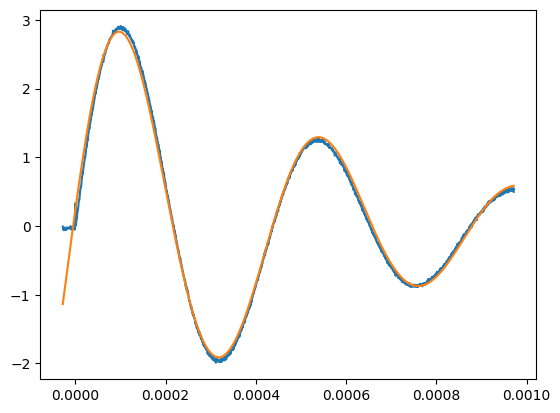

In [102]:
#Dados
R = 100
C = 0.1e-6
L = 0.44e-3
gamma = R/(2*L)
omega0 = 1/(np.sqrt(L*C))
omega = np.sqrt(omega0**2 - gamma**2)

time, volt1 = readCsv('./data/scope_1.csv')

plt.plot(time,volt1)

param, _ = curve_fit(trans,time,volt1,p0=[volt1.max(),gamma,omega,0])
newTrans = ft.partial(trans,Q=param[0],gamma=param[1],omega=param[2],delta=param[3])
print(param)
print(omega)

plt.plot(time,[newTrans(t) for t in time])
T = (2*np.pi)/param[2]
print(T)

#Vendo o Tempo de Decaimento
"""tau = decaimento(time,volt1)
plt.plot(time[100:],[decaimentoeq(t,volt1.max(),tau) for t in time[100:]])
print(tau)"""
plt.show()

### Transiente no Circuito LC

[ 2.29165495e+01  7.78200771e+02  1.44825278e+04 -1.85417791e-02]
149788.9355280008
R = 0.6848166783754515
0.0004338458986289078


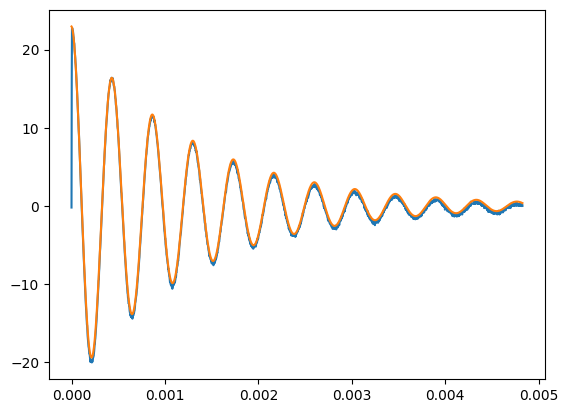

In [99]:
#Dados
R = 15
C = 0.1e-6
L = 0.44e-3
gamma = R/(2*L)
omega0 = 1/(np.sqrt(L*C))
omega = np.sqrt(omega0**2 - gamma**2)

time,func,volt = readCsv('./data/scope_3.csv')

time,volt = cleanData(time,volt,1)

plt.plot(time,volt)
#plt.plot(time,func)

param, _ = curve_fit(trans,time,volt,p0=[volt.max(),gamma,omega,0])
print(param)
print(omega)
print(f'R = {estimR(param[1],L)}')

plt.plot(time,[trans(t,param[0],param[1],param[2],param[3]) for t in time])
T = (2*np.pi)/param[2]
print(T)

plt.show()

### Transiente no Circuito com potênciômetro